In [28]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [35]:
# articles = pd.read_csv("../../data/articles.csv", delimiter="|", quotechar="^", header=0, parse_dates=["scrapdate"])
articles = pd.read_json("../../data/articles.json")
articles

,comments,content,is_fake,pub_date,scrap_date,url
0,,\r\n„Wprowadzamy do menu prawdziwe superfood! ...,TODO,TODO,2018-01-21 01:00:06,https://www.wprost.pl/kraj/10084881/warszawska...
1,,"W ostatnich dniach media obiegła wiadomość, że...",TODO,TODO,2018-01-21 01:00:06,http://superbiz.se.pl/wiadomosci-biz/nie-kupis...
2,,"To help personalize content, tailor and measur...",TODO,TODO,2018-01-21 01:00:06,https://web.facebook.com/ZonaKrawca/posts/3691...
3,,"Bary, kawiarnie, restauracje oraz wszelkiego r...",TODO,TODO,2018-01-21 01:00:06,https://www.papilot.pl/lifestyle-ciekawostki/z...
4,,Jedna z warszawskich kawiarni zszokowała swoic...,TODO,TODO,2018-01-21 01:00:06,http://www.portalniezalezny.pl/szok-kawa-kobie...
5,\ndodasz komentarz jako\n - jeżeli chcesz zare...,"""Prawdziwe superfood"" - piszą na Twitterze.Ofe...",TODO,TODO,2018-01-21 01:00:06,https://www.kozaczek.pl/plotka/ze-co-warszawsk...
6,,\r\n \r\n ...,TODO,TODO,2018-01-21 01:00:06,http://www.wirtualnemedia.pl/artykul/mleko-kob...
7,,Kanały w klimacie Radia ESKAPobierz aplikacjeN...,TODO,TODO,2018-01-21 01:00:07,http://www.eska.pl/hotplota/news/mleko-sojowe-...
8,,Jesteśmy przyzwyczajeni do kulinarnych nowości...,TODO,TODO,2018-01-21 01:00:07,http://viva.pl/styl-zycia/zona-krawca-kawiarni...
9,,\nW miniony weekend na facebookowym profilu wa...,TODO,TODO,2018-01-21 01:00:07,"http://polki.pl/magazyn/o-tym-sie-mowi,kobiece..."


In [36]:
# generate fake "isFake" values
articles["isFake"] = np.random.choice(np.array([True, False]), len(articles))
# generate fake "pubdate" values
rnd_dates = pd.date_range(start='11/6/2017', end='11/8/2017', freq="30min") # US date format
articles["pub_date"] = np.random.choice(rnd_dates, len(articles))

# if it is fake why don't we generate influences also? just for learn how to draw nice plots
articles["readers"] = np.random.randint(low=100, high=100000, size=len(articles))
articles

,comments,content,is_fake,pub_date,scrap_date,url,isFake,readers
0,,\r\n„Wprowadzamy do menu prawdziwe superfood! ...,TODO,2017-11-07 01:00:00,2018-01-21 01:00:06,https://www.wprost.pl/kraj/10084881/warszawska...,False,55229
1,,"W ostatnich dniach media obiegła wiadomość, że...",TODO,2017-11-08 00:00:00,2018-01-21 01:00:06,http://superbiz.se.pl/wiadomosci-biz/nie-kupis...,True,2358
2,,"To help personalize content, tailor and measur...",TODO,2017-11-07 11:00:00,2018-01-21 01:00:06,https://web.facebook.com/ZonaKrawca/posts/3691...,False,85138
3,,"Bary, kawiarnie, restauracje oraz wszelkiego r...",TODO,2017-11-06 19:30:00,2018-01-21 01:00:06,https://www.papilot.pl/lifestyle-ciekawostki/z...,False,61880
4,,Jedna z warszawskich kawiarni zszokowała swoic...,TODO,2017-11-06 06:30:00,2018-01-21 01:00:06,http://www.portalniezalezny.pl/szok-kawa-kobie...,False,10173
5,\ndodasz komentarz jako\n - jeżeli chcesz zare...,"""Prawdziwe superfood"" - piszą na Twitterze.Ofe...",TODO,2017-11-07 00:00:00,2018-01-21 01:00:06,https://www.kozaczek.pl/plotka/ze-co-warszawsk...,True,35680
6,,\r\n \r\n ...,TODO,2017-11-06 20:00:00,2018-01-21 01:00:06,http://www.wirtualnemedia.pl/artykul/mleko-kob...,True,54956
7,,Kanały w klimacie Radia ESKAPobierz aplikacjeN...,TODO,2017-11-06 23:30:00,2018-01-21 01:00:07,http://www.eska.pl/hotplota/news/mleko-sojowe-...,True,30188
8,,Jesteśmy przyzwyczajeni do kulinarnych nowości...,TODO,2017-11-06 13:30:00,2018-01-21 01:00:07,http://viva.pl/styl-zycia/zona-krawca-kawiarni...,True,75027
9,,\nW miniony weekend na facebookowym profilu wa...,TODO,2017-11-07 23:30:00,2018-01-21 01:00:07,"http://polki.pl/magazyn/o-tym-sie-mowi,kobiece...",False,75630


In [37]:
fakes = articles[articles["isFake"] == True]
corrections = articles[articles["isFake"] == False]
corrections

,comments,content,is_fake,pub_date,scrap_date,url,isFake,readers
0,,\r\n„Wprowadzamy do menu prawdziwe superfood! ...,TODO,2017-11-07 01:00:00,2018-01-21 01:00:06,https://www.wprost.pl/kraj/10084881/warszawska...,False,55229
2,,"To help personalize content, tailor and measur...",TODO,2017-11-07 11:00:00,2018-01-21 01:00:06,https://web.facebook.com/ZonaKrawca/posts/3691...,False,85138
3,,"Bary, kawiarnie, restauracje oraz wszelkiego r...",TODO,2017-11-06 19:30:00,2018-01-21 01:00:06,https://www.papilot.pl/lifestyle-ciekawostki/z...,False,61880
4,,Jedna z warszawskich kawiarni zszokowała swoic...,TODO,2017-11-06 06:30:00,2018-01-21 01:00:06,http://www.portalniezalezny.pl/szok-kawa-kobie...,False,10173
9,,\nW miniony weekend na facebookowym profilu wa...,TODO,2017-11-07 23:30:00,2018-01-21 01:00:07,"http://polki.pl/magazyn/o-tym-sie-mowi,kobiece...",False,75630
15,,"Ozzy Osbourne w Polsce 2018: BILETY, DATA, MIE...",TODO,2017-11-07 05:00:00,2018-01-21 01:00:08,http://www.eskarock.pl/eska_rock_news/kobiece_...,False,32694
16,"komentarzy do ""Warszawska kawiarnia wprowadz...","Karmienie piersią z Leonem mi nie wyszło, za t...",TODO,2017-11-06 08:00:00,2018-01-21 01:00:08,https://moi-mili.pl/warszawska-kawiarnia-wprow...,False,23026
17,,„Wprowadzamy do menu prawdziwe superfood! Od ś...,TODO,2017-11-06 04:00:00,2018-01-21 01:00:08,https://warszawawpigulce.pl/przysmak-czy-ohyda...,False,46124
21,,W Internetach zagrzmiało gdy na fp jedna z war...,TODO,2017-11-06 01:30:00,2018-01-21 01:00:08,http://mamyruszamy.pl/tag/zona-krawca/,False,9795
23,,"góraniedziela, 21 stycznia 2018fot. Stanislaw ...",TODO,2017-11-07 00:00:00,2018-01-21 01:00:08,https://www.eastnews.pl/pictures/subject/id/01...,False,71059


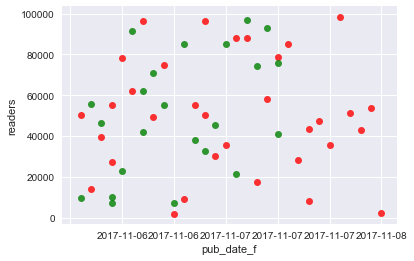

In [40]:
# seaborn does not support datetime, but there is an ugly hack
# src: https://stackoverflow.com/questions/44354614/seaborn-regplot-using-datetime64-as-the-x-axis

def ugly_date_hack(df):
    df = df.sort_values('pub_date')
    df['pub_date_f'] = pd.factorize(df['pub_date'])[0] + 1
    mapping = dict(zip(df['pub_date_f'], df['pub_date'].dt.date))
    return (df, mapping)
    
fakes, mapping = ugly_date_hack(fakes)
corrections, labels = ugly_date_hack(corrections)
ax = sns.regplot('pub_date_f', 'readers', data=fakes, fit_reg=False, color="red")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ay = sns.regplot('pub_date_f', 'readers', data=corrections, fit_reg=False, color="green")
ax.set_xticklabels(labels)

In [27]:
type(articles["scrap_date"][0])

str